<a href="https://colab.research.google.com/github/MariiaKhai/Dance_dance/blob/master/Regression_Airbnb_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Barcelona, Catalonia, Spain

# Exploratory Data Analysis and Feature engineering



In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


sns.set()
%matplotlib inline

In [158]:
df = pd.read_csv('http://data.insideairbnb.com/spain/catalonia/barcelona/2022-09-10/visualisations/listings.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,673276379194656210,Habitación muy acogedora.,51421682,Maria Das Merces,Sants-Montjuïc,la Bordeta,41.363004,2.125326,Private room,59,1,9,2022-09-08,9.00,1,351,9,Exempt
1,44192271,Cozy terrace apartment\nApartamento con patio,200754964,Nuria,Les Corts,la Maternitat i Sant Ramon,41.372630,2.113180,Entire home/apt,110,3,54,2022-08-26,2.45,1,151,40,HUTB-013294
2,196021,"Large patio, 4 baths (3 en-suite), 19th c, cen...",953719,Julia,Eixample,l'Antiga Esquerra de l'Eixample,41.388420,2.161080,Entire home/apt,386,4,316,2022-08-12,2.37,1,238,45,HUTB-506707
3,196196,✨Large Apt near Sagrada Familia / Shared terrace✨,567180,Sandra,Eixample,la Sagrada Família,41.406600,2.174590,Entire home/apt,245,2,103,2022-08-10,0.77,19,22,11,HUTB-000325
4,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia And Maria,Eixample,la Sagrada Família,41.405560,2.172620,Entire home/apt,180,1,30,2022-08-29,0.27,38,60,9,HUTB-002062


In [159]:
df.shape

(16920, 18)

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16920 entries, 0 to 16919
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              16920 non-null  int64  
 1   name                            16910 non-null  object 
 2   host_id                         16920 non-null  int64  
 3   host_name                       16918 non-null  object 
 4   neighbourhood_group             16920 non-null  object 
 5   neighbourhood                   16920 non-null  object 
 6   latitude                        16920 non-null  float64
 7   longitude                       16920 non-null  float64
 8   room_type                       16920 non-null  object 
 9   price                           16920 non-null  int64  
 10  minimum_nights                  16920 non-null  int64  
 11  number_of_reviews               16920 non-null  int64  
 12  last_review                     

We have 17 features, some of them are in interval scale (price,latitude, longitude, number_of_reviews, avaibility_365 etc.), some of them in nominal scale (neighborhood, neighbourhood_group, room_type etc). Target variable is price, other variables we can use as factors. id, host_id, host_name and license we can't use as features, but, for example, based on a number of license we can create another feature. last_review is date, we won't use now this variable.

Also, we can see missing values and impute some values instead of them. For example here for reviews_per_month, we can replace NA on 0.

In [161]:
#Impute 0 instead missing values for reviews_per_month
df.reviews_per_month.fillna(0, inplace=True)
print(df.isnull().any())

id                                False
name                               True
host_id                           False
host_name                          True
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                        True
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
number_of_reviews_ltm             False
license                            True
dtype: bool


For license we use recoding.

In [162]:
#Finding out the number of licenses 
top_10 = (df.groupby(['license'])['id'].count()
        .sort_values(ascending = False))

In [163]:
top_10

license
Exempt         4272
HUTB-123456      31
AJ000593         22
AJ000517         21
HUTB-022013      20
               ... 
HUTB-005290       1
HUTB-005289       1
HUTB-005286       1
HUTB-005283       1
x                 1
Name: id, Length: 5598, dtype: int64

In [164]:
#Recode license: Exempt=0, other=1 - The host has a license or not
df['license_Exempt'] = np.where(df['license'] == "Exempt", 0, 1)


In [165]:
#Determine how license impact on price
df.groupby(["license_Exempt"], as_index=False).agg(avg_price = ("price","median"), count = ("price","count"))

,license_Exempt,avg_price,count
0,0,60.0,4272
1,1,133.0,12648


Host, who has a license, has more expensive apartments.

Look at the distribution on price

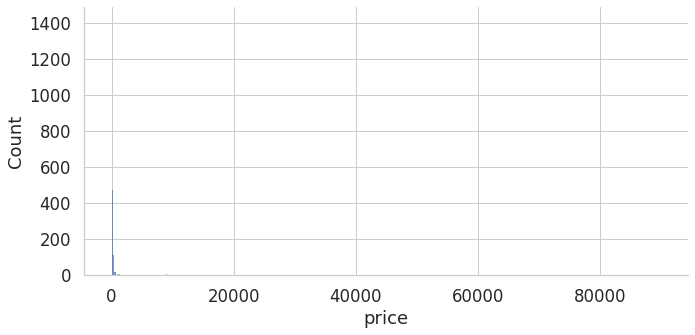

In [166]:
sns.set_theme(font_scale=1.5, style="whitegrid")
sns.displot(data=df, x="price", kind="hist", aspect=2)

The distribution is highly skewed because of the outliers with very high prices. In such cases, it is better to take the logarithm of prices.

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


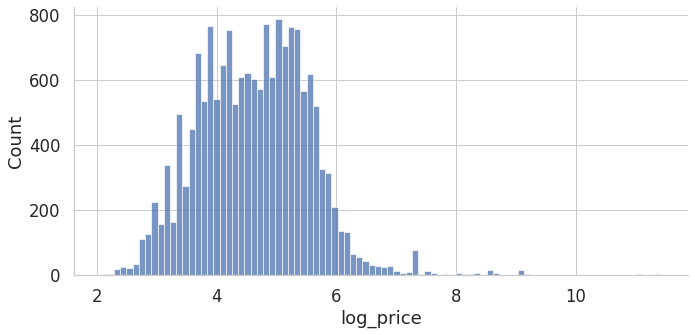

In [167]:
df = df[df.price!=0]
df.loc[:,"log_price"] = np.log(df.loc[:,"price"])
sns.displot(data=df, x="log_price", kind="hist", aspect=2)

Check log_price on normality

In [168]:
import scipy
stat, p = scipy.stats.shapiro(df['log_price']) 
print('Statistics=%.3f, p-value=%.3f' % (stat, p))


Statistics=0.984, p-value=0.000


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Log_Price isn't normal distribution, but closer to it. We can suppose that Prise has a log normal distribution.

Investigate number_of_reviews and reviews_per_month

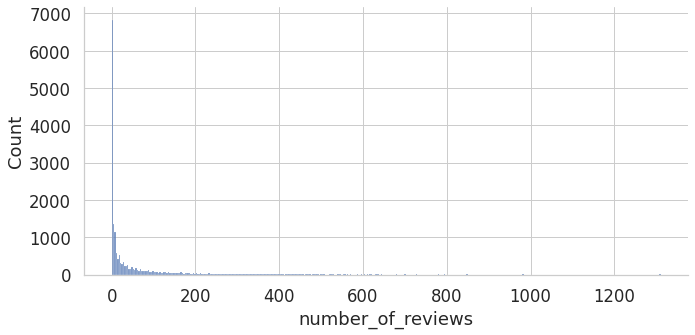

In [169]:
sns.displot(data=df, x="number_of_reviews", kind="hist", aspect=2)

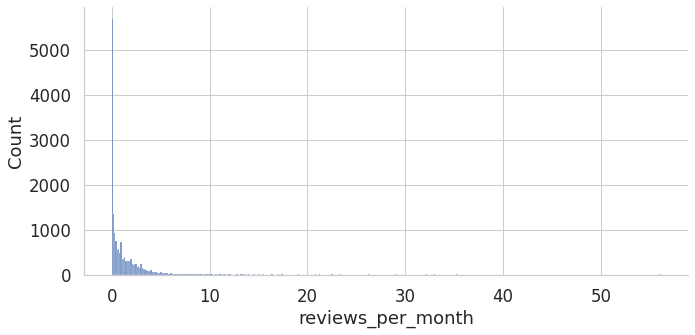

In [170]:
sns.displot(data=df, x="reviews_per_month", kind="hist", aspect=2)

Same situation, we will transform variables in log_reviews and log_reviews_per_month

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


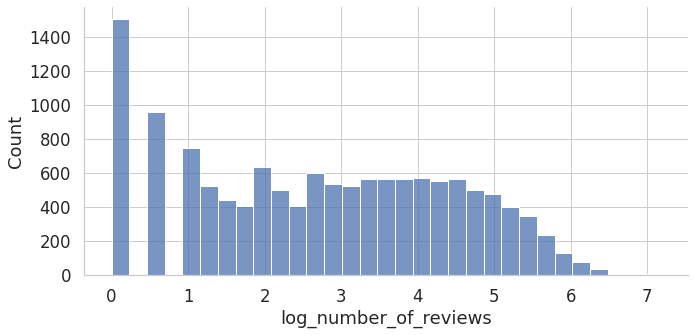

In [171]:
df.loc[:,"log_number_of_reviews"] = np.log(df.loc[:,"number_of_reviews"])
sns.displot(data=df, x="log_number_of_reviews", kind="hist", aspect=2)

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


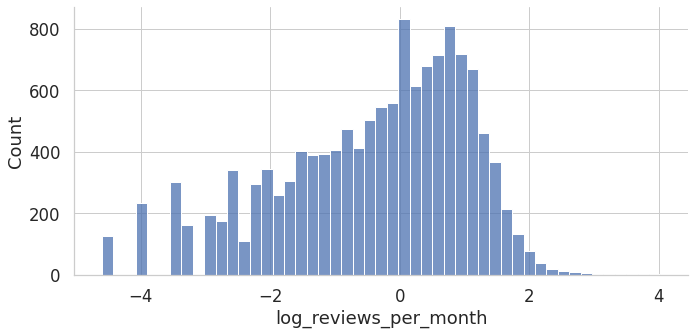

In [172]:
df.loc[:,"log_reviews_per_month"] = np.log(df.loc[:,"reviews_per_month"])
sns.displot(data=df, x="log_reviews_per_month", kind="hist", aspect=2)

In the model we can use new log features.

Investigate, how we can use features neighbourhood and neighbourhood_group

In [173]:
# Finding out the neighborhoods 
top_10 = (df.groupby(['neighbourhood'])['id'].count()
        .sort_values(ascending = False).head(10))

In [174]:
top_10

neighbourhood
la Dreta de l'Eixample                   2030
el Raval                                 1216
el Barri Gòtic                           1047
la Sagrada Família                        961
la Vila de Gràcia                         952
Sant Pere, Santa Caterina i la Ribera     933
l'Antiga Esquerra de l'Eixample           863
Sant Antoni                               803
el Poble Sec                              775
la Nova Esquerra de l'Eixample            587
Name: id, dtype: int64

We have a lot of neighborhoods. Let's look at the median price in these neighborhoods. (Median is better for log-normal distributions than mean)

In [175]:
table = pd.pivot_table(df, values=['price'], index=['neighbourhood'], 
                    aggfunc={'neighbourhood': 'count',
                             'price': [min, max, np.median]})

In [176]:
table = table.reindex(table['neighbourhood'].sort_values(by='count', ascending=False).index)


In [177]:
table

neighbourhood   price              
                               count     max median    min
neighbourhood                                             
la Dreta de l'Eixample          2030  9200.0  187.0   10.0
el Raval                        1216  9999.0   75.0   11.0
el Barri Gòtic                  1047  6000.0   86.0   11.0
la Sagrada Família               961  5500.0  139.0    9.0
la Vila de Gràcia                952  4000.0  120.0    8.0
...                              ...     ...    ...    ...
Vallbona                           4   140.0   86.0   40.0
Can Peguera                        2    49.0   39.5   30.0
Ciutat Meridiana                   1    49.0   49.0   49.0
Canyelles                          1   100.0  100.0  100.0
la Clota                           1    25.0   25.0   25.0

[73 rows x 4 columns]

We can use this information in the model, but in some neighborhoods,  we can see 1-3 offers of apartments. It is not representative. To use another feature - neighbourhood_group. It will be better for the model.

In [178]:
# Finding out the neighborhoods_group
table_group = pd.pivot_table(df, values=['price'], index=['neighbourhood_group'], 
                    aggfunc={'neighbourhood_group': 'count',
                             'price': [min, max, np.median]})

In [179]:
table_group = table_group.reindex(table_group['neighbourhood_group'].sort_values(by='count', ascending=False).index)

In [180]:
table_group

neighbourhood_group    price             
                                  count      max median   min
neighbourhood_group                                          
Eixample                           5692  90000.0  149.0   9.0
Ciutat Vella                       3553   9999.0   79.0  11.0
Sants-Montjuïc                     2146   9211.0   88.0   9.0
Sant Martí                         1640   8999.0  102.5  10.0
Gràcia                             1420   4000.0  109.5   8.0
Les Corts                           755   9100.0   91.0  11.0
Sarrià-Sant Gervasi                 725   9026.0  108.0  15.0
Horta-Guinardó                      439  63917.0   54.0   9.0
Sant Andreu                         360   9000.0   51.0  14.0
Nou Barris                          189   1410.0   40.0  12.0

We can see, for some neighborhood groups the median price higher than for others. We can create a dummy variables on base this feature and look at the correlation with price.

In [181]:
df['neighbourhood_group_Eixample'] = np.where(df['neighbourhood_group'] == "Eixample", 1, 0)

In [182]:
df = df[["log_price","latitude", "longitude", "log_number_of_reviews","log_reviews_per_month", "minimum_nights",	"reviews_per_month", "number_of_reviews_ltm" , "calculated_host_listings_count", "license_Exempt", 'neighbourhood_group', 'room_type']]
df = pd.get_dummies(df, columns=['neighbourhood_group','room_type'])
df.head()

,log_price,latitude,longitude,log_number_of_reviews,log_reviews_per_month,minimum_nights,reviews_per_month,number_of_reviews_ltm,calculated_host_listings_count,license_Exempt,...,neighbourhood_group_Les Corts,neighbourhood_group_Nou Barris,neighbourhood_group_Sant Andreu,neighbourhood_group_Sant Martí,neighbourhood_group_Sants-Montjuïc,neighbourhood_group_Sarrià-Sant Gervasi,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,4.077537,41.363004,2.125326,2.197225,2.197225,1,9.00,9,1,0,...,0,0,0,0,1,0,0,0,1,0
1,4.700480,41.372630,2.113180,3.988984,0.896088,3,2.45,40,1,1,...,1,0,0,0,0,0,1,0,0,0
2,5.955837,41.388420,2.161080,5.755742,0.862890,4,2.37,45,1,1,...,0,0,0,0,0,0,1,0,0,0
3,5.501258,41.406600,2.174590,4.634729,-0.261365,2,0.77,11,19,1,...,0,0,0,0,0,0,1,0,0,0
4,5.192957,41.405560,2.172620,3.401197,-1.309333,1,0.27,9,38,1,...,0,0,0,0,0,0,1,0,0,0


In [183]:
#I used correlation by Spearman, because it is better for not normal distribution
corr_matrix= df.corr(method='spearman')
corr_matrix
#corr_matrix['log_price'].sort_values(ascending=False)

,log_price,latitude,longitude,log_number_of_reviews,log_reviews_per_month,minimum_nights,reviews_per_month,number_of_reviews_ltm,calculated_host_listings_count,license_Exempt,...,neighbourhood_group_Les Corts,neighbourhood_group_Nou Barris,neighbourhood_group_Sant Andreu,neighbourhood_group_Sant Martí,neighbourhood_group_Sants-Montjuïc,neighbourhood_group_Sarrià-Sant Gervasi,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
log_price,1.000000,0.001834,0.000387,0.226524,0.238807,-0.314519,0.229952,0.340506,0.373108,0.329212,...,-0.035019,-0.096971,-0.095743,-0.002196,-0.063814,0.012439,0.530152,0.083150,-0.531392,-0.098819
latitude,0.001834,1.000000,0.387177,0.010418,-0.049624,0.010190,-0.045501,-0.028372,-0.006160,0.033037,...,-0.221323,0.177718,0.242065,0.337822,-0.549270,0.182153,-0.000212,-0.009137,-0.001193,0.015759
longitude,0.000387,0.387177,1.000000,-0.040943,-0.060445,0.072996,-0.036507,-0.034640,-0.039333,-0.022710,...,-0.339161,0.068587,0.218606,0.484143,-0.382858,-0.273625,0.021034,-0.012654,-0.013764,-0.023309
log_number_of_reviews,0.226524,0.010418,-0.040943,1.000000,0.801570,-0.141088,0.625812,0.711147,-0.070408,0.124735,...,0.027481,-0.036452,-0.033687,0.022631,0.041083,-0.039995,0.137019,-0.012000,-0.136769,0.003726
log_reviews_per_month,0.238807,-0.049624,-0.060445,0.801570,1.000000,-0.224305,1.000000,0.758268,-0.011109,-0.060231,...,0.051343,-0.035286,0.010332,-0.021593,0.045356,-0.027962,0.059599,-0.040788,-0.053630,0.009834
minimum_nights,-0.314519,0.010190,0.072996,-0.141088,-0.224305,1.000000,-0.230539,-0.192601,-0.040444,-0.049525,...,-0.064086,0.015726,-0.008805,-0.005158,-0.033115,0.013479,0.125599,-0.105136,-0.087420,-0.084916
reviews_per_month,0.229952,-0.045501,-0.036507,0.625812,1.000000,-0.230539,1.000000,0.843871,-0.038642,-0.031007,...,0.050874,-0.036968,0.000540,-0.000994,0.043137,-0.047045,0.113105,-0.022060,-0.107961,-0.007791
number_of_reviews_ltm,0.340506,-0.028372,-0.034640,0.711147,0.758268,-0.192601,0.843871,1.000000,0.077757,0.077249,...,0.045043,-0.043930,-0.015206,0.002625,0.031672,-0.041245,0.247315,-0.000777,-0.248953,-0.002015
calculated_host_listings_count,0.373108,-0.006160,-0.039333,-0.070408,-0.011109,-0.040444,-0.038642,0.077757,1.000000,0.239876,...,-0.003443,-0.060396,-0.060394,-0.080706,-0.045967,0.026221,0.400448,0.026511,-0.410720,0.005921
license_Exempt,0.329212,0.033037,-0.022710,0.124735,-0.060231,-0.049525,-0.031007,0.077249,0.239876,1.000000,...,-0.037797,-0.039194,-0.055718,-0.023867,-0.018454,0.000041,0.334791,0.058727,-0.355293,0.026066


We can see a linear correlation with many variables. We will use features that have a correlation higher 0.2 in abs values. And drop features, which have correletion with other features (because we don't want to have problem of multicollinearity).

In [184]:
df = df.drop(['room_type_Hotel room','latitude','neighbourhood_group_Sarrià-Sant Gervasi', 'longitude', 'room_type_Hotel room', 'room_type_Shared room',
'neighbourhood_group_Sant Martí','neighbourhood_group_Gràcia','neighbourhood_group_Les Corts','neighbourhood_group_Sants-Montjuïc','neighbourhood_group_Horta-Guinardó',
'neighbourhood_group_Nou Barris','neighbourhood_group_Ciutat Vella','room_type_Shared room','neighbourhood_group_Sant Andreu', 'log_reviews_per_month', 'log_number_of_reviews' ], axis=1)
df.head()

,log_price,minimum_nights,reviews_per_month,number_of_reviews_ltm,calculated_host_listings_count,license_Exempt,neighbourhood_group_Eixample,room_type_Entire home/apt,room_type_Private room
0,4.077537,1,9.00,9,1,0,0,0,1
1,4.700480,3,2.45,40,1,1,0,1,0
2,5.955837,4,2.37,45,1,1,1,1,0
3,5.501258,2,0.77,11,19,1,1,1,0
4,5.192957,1,0.27,9,38,1,1,1,0


Create of scatter plots for interval variables.Use pairplot for visualisation.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


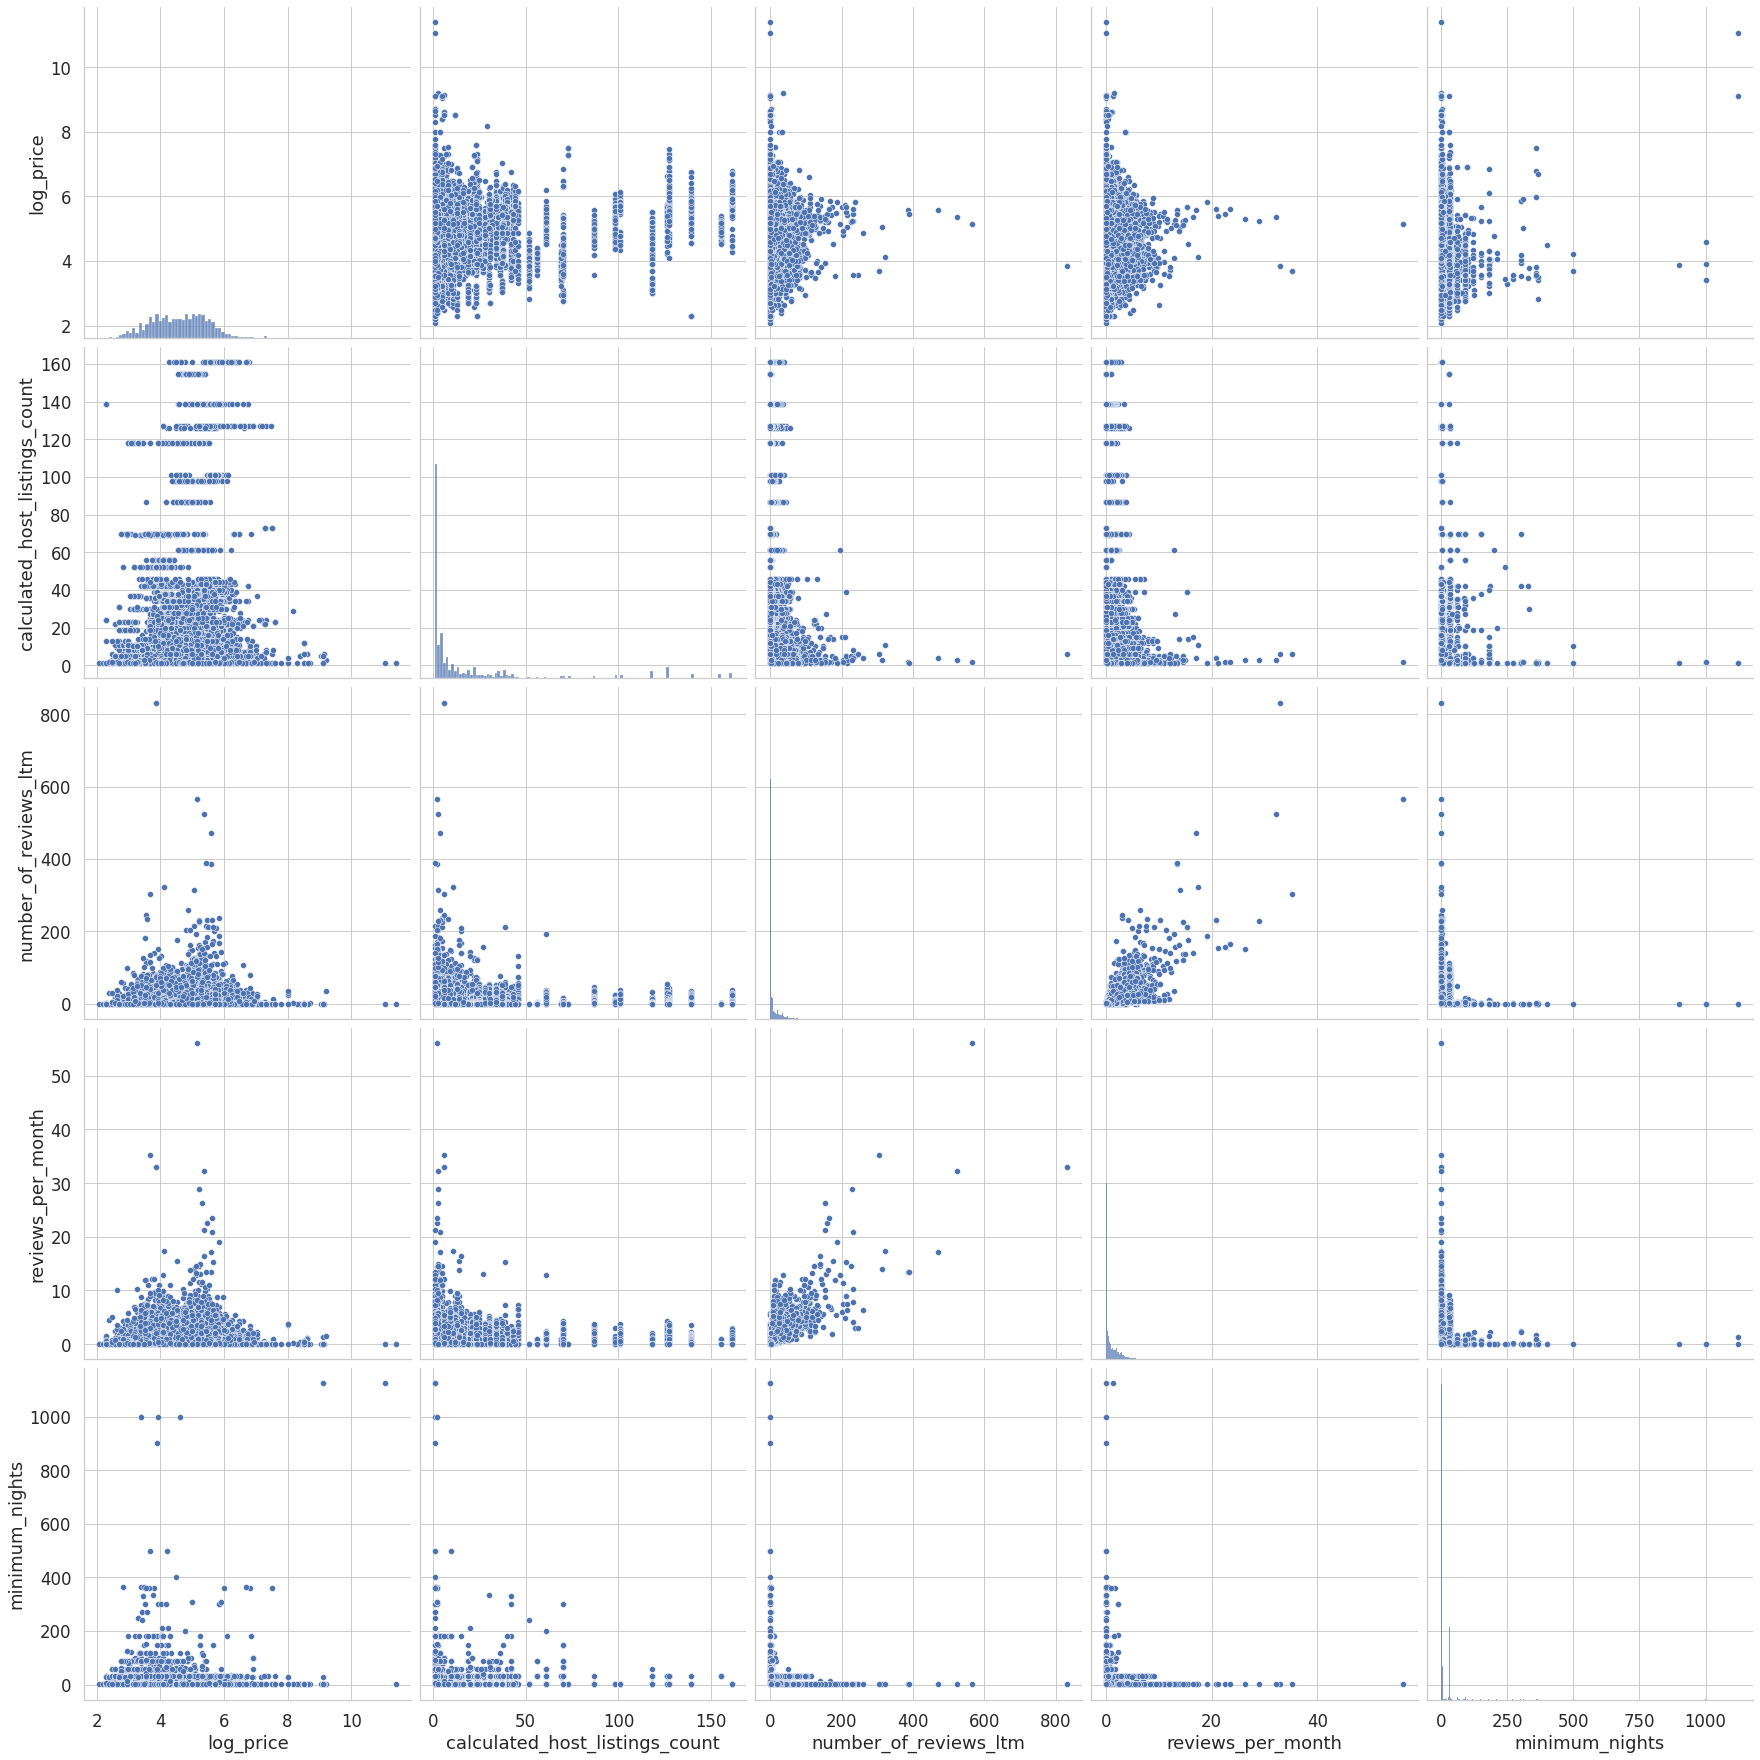

In [185]:
sns.pairplot(df[['log_price',	'calculated_host_listings_count',	'number_of_reviews_ltm',	'reviews_per_month',	"minimum_nights"]], size=5)

We don't see direct linear dependensies between different features, but we can create multiliner model, which will have a high absilute error. But, we can do it. And we can use other models too, glm< for example.

# Modeling

Multiple Linear Regression

In [186]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x = df.drop('log_price', axis=1)
y = df['log_price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

R2 for Multiple Linear Regression. 

In [187]:
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.3170562376616538
0.33889524613942124


R2 is not high. That is why we can't trust results of model.

We can use cross-validation for getting more stable results. But, it is not helpful for us.

In [188]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, x_train, y_train, cv=10).mean()

0.3065284610103304

We can realize linear regression in Python, using package statsmodels for getting more detailed results.

In [189]:
import statsmodels.api as sm

In [190]:
model_new = sm.OLS(y_train, x_train)
results = model_new.fit()

In [191]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:              log_price   R-squared (uncentered):                   0.960
Model:                            OLS   Adj. R-squared (uncentered):              0.960
Method:                 Least Squares   F-statistic:                          3.080e+04
Date:                Sun, 20 Nov 2022   Prob (F-statistic):                        0.00
Time:                        19:40:40   Log-Likelihood:                         -13732.
No. Observations:               10151   AIC:                                  2.748e+04
Df Residuals:                   10143   BIC:                                  2.754e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------

Also, we can analyze residuals. We can see high heteroscedasticity. 

In [192]:
results.resid

1149    -0.380947
3866     0.322428
15887    1.402324
12164    0.105453
1958    -0.791845
           ...   
9225     0.158603
13124    0.302608
9845    -0.560832
10800   -0.015074
2732    -0.252642
Length: 10151, dtype: float64

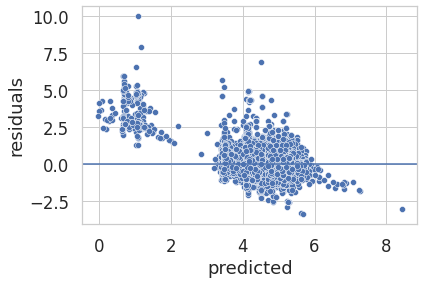

In [193]:
# create a DataFrame of predicted values and residuals
df["predicted"] = results.predict(x)
df["residuals"] = results.resid
sns.scatterplot(data=df, x="predicted", y="residuals")
plt.axhline(y=0)

For this dataset we can try to use XGBoost model. 

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16919 entries, 0 to 16919
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   log_price                       16919 non-null  float64
 1   minimum_nights                  16919 non-null  int64  
 2   reviews_per_month               16919 non-null  float64
 3   number_of_reviews_ltm           16919 non-null  int64  
 4   calculated_host_listings_count  16919 non-null  int64  
 5   license_Exempt                  16919 non-null  int64  
 6   neighbourhood_group_Eixample    16919 non-null  uint8  
 7   room_type_Entire home/apt       16919 non-null  uint8  
 8   room_type_Private room          16919 non-null  uint8  
 9   predicted                       16919 non-null  float64
 10  residuals                       10151 non-null  float64
dtypes: float64(4), int64(4), uint8(3)
memory usage: 1.7 MB


In [195]:
# drop predicted, residuals
df = df.drop(["predicted","residuals"], axis=1)

In [136]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

x = df.drop('log_price', axis=1)
y = df['log_price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

model = GradientBoostingRegressor(random_state=0)
model.fit(x_train, y_train)

GradientBoostingRegressor(random_state=0)

In [137]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, model.predict(x_test))

0.41698371474802987

In [138]:
# Compute the mean R2 score 
from sklearn.model_selection import cross_val_score
cross_val_score(model, x_train, y_train).mean()

0.5817586712392794

R2 is higher than for linear model. It is good!

In [139]:
cross_val_score(model, x_test, y_test).mean()

0.548180911279921

In [140]:
# Use GridSearchCV to tune hyperparameters (it is not the best practice, the RandomizedSearchCV can give us estimate with more high results, but here I desided to try GridSearchCV)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [10, 50, 100],
    'max_features': [2, 3, 4],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [5, 10, 15]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=2)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=5; total time=   0.8s
[CV] END max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=5; total time=   0.8s
[CV] END max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=5; total time=   0.8s
[CV] END max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=5; total time=   0.8s
[CV] END max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=5; total time=   0.8s
[CV] END max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=10; total time=   0.8s
[CV] END max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=10; total time=   0.8s
[CV] END max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=10; total time=   0.8s
[CV] END max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=10; total time=   0.8s
[CV] END max_depth=10, max_features=2, min_

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=0),
             param_grid={'max_depth': [10, 50, 100], 'max_features': [2, 3, 4],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [5, 10, 15]},
             verbose=2)

In [141]:
# Compute the mean R2 score across five folds using the best model
best_model = grid_search.best_estimator_
cross_val_score(best_model, x_train, y_train).mean()

0.6396773150554148

We got better results than in a linear model. For train sample exactly.

In [142]:
cross_val_score(best_model, x_test, y_test).mean()

0.5643585534878917

For test sample result is worse.


Predict price for first (zero) case

In [143]:
df

,log_price,minimum_nights,reviews_per_month,number_of_reviews_ltm,calculated_host_listings_count,license_Exempt,neighbourhood_group_Eixample,room_type_Entire home/apt,room_type_Private room
0,4.077537,1,9.00,9,1,0,0,0,1
1,4.700480,3,2.45,40,1,1,0,1,0
2,5.955837,4,2.37,45,1,1,1,1,0
3,5.501258,2,0.77,11,19,1,1,1,0
4,5.192957,1,0.27,9,38,1,1,1,0
...,...,...,...,...,...,...,...,...,...
16915,8.517193,1,0.59,0,12,1,0,0,1
16916,8.517193,1,0.05,0,12,1,0,0,1
16917,8.517193,1,0.33,0,12,1,0,0,1
16918,5.521461,6,0.19,2,1,1,0,1,0


In [144]:
model.predict([[1,	9.00,	9,	1,	0,	0,	0,	1]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([3.99383772])

We can see - the result is close for one cases.

**For prediction Price we should use exp(log_price)**

Look at the residuals.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


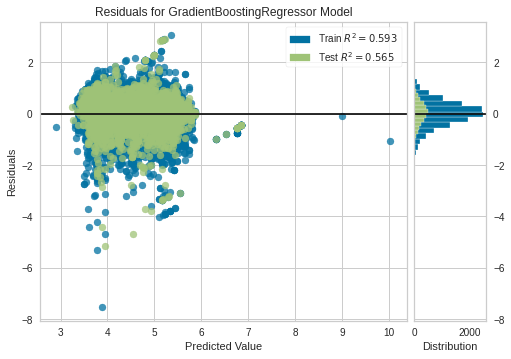

In [156]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(model)
visualizer.fit(x_train, y_train)  
visualizer.score(x_test, y_test)  
g = visualizer.poof()             

We can see a fairly random, uniform distribution of the residuals against the target variable in two dimensions. This seems to indicate that our model is performing well. Also, we can see a histogram of the error values along the right-hand side. The error is normally distributed around zero, which also generally indicates a well-fitted model. But for some cases we can see not good results. 